# Traitement de données, 2022, TD2

Ceci est un notebook python, qui va être utilisé pour le TD d'ajourd'hui. Il se trouve sur Google Colab, pour être facile à partager. Attention : Vous devriez pouvoir l'éditer, mais tant que vous ne l'avez pas téléchargé ou copié, aucune de vos modifications ne seront sauvées.

Pour ajouter vos solutions aux questions vous pouvez soit

Créer une copie de ce notebook sur votre propre compte Google (Fichier>Sauvegarder un copie sur Drive).
Télécharger le notebook (Fichier>Télécharger>.ipynb) et l'éditer/executer sur jupyter lab/notebook.
Télécharger le script python correspondant (Fichier>Télécharger>.py), l'éditer avec un éditeur de texte/code local et l'executer avec l'interpreteur local (python(3)), possiblement en utilisant un environement virtuel conda (ou tout faire dans un IDE).

## I- Données de MusicBrainz

MusicBrainz est une vaste base de données musical en ligne. Elle contient des informations sur les musiciens, les albums, les chansons, leur localisation, etc. L'ensemble des données de MusicBrainz est disponible au travers d'une [API](https://musicbrainz.org/doc/MusicBrainz_API).

On s'intéresse ici aux musiciens de Nancy. Pour récupérer des informations sur les relations entre types d'objets, on va utiliser la fonction "browse" de l'API de MusicBrainz.

Comme expliqué dans la documentationd de l'API, sachant que l'URL de base de l'API est https://musicbrainz.org/ws/2/, une requete de type browse prend la forme 
```
 /<RESULT_ENTITY_TYPE>?<BROWSING_ENTITY_TYPE>=<MBID>&limit=<LIMIT>&offset=<OFFSET>&inc=<INC>
```

Ici, on s'interesse aux artistes localisés à Nancy, donc :
* RESULT_ENTYT_TYPE est `artist`
* BROWSING_ENTITY_TYPE est `area`
* MBID est l'identifiant de Nancy dans MusicBrainz, i.e. `2b7c4074-dded-4703-a7de-e1d045c34b5c`

On voudra aussi que l'informatin sur le genre de musique, si disponible, soit inclu dans le résultat. Donc on mettra la valeur `genres` pour INC.

On veut obtenir un maximum de résultats, donc on mettra `100` pour LIMIT, qui est le nombre maximum de résultats que MusicBrainz peut renvoyer. 

On laissera OFFSET à `0` pour le moment. 

### Simple requete

Commencez par utiliser la librairie `requests` de python pour appeller l'API de MusicBrainz avec ces paramètres et afficher le resultat : 
``` 
r = requests.get(...)
print(r.text)
```

### Résultat en JSON
Vous remarquerez que MusicBrainz, par default, renvoie du XML. Pour lui demander de renvoyer du JSON à la place, il faut utiliser l'entête `Accept` dans la requête HTTP realisée par `requests` et lui donner la valeur `application/json`. Pour cela, utlisez l'argument `headers` de la function `get` avec comme valeur le dictionnaire :
```
{"Accept": "application/json"}
```
Le resultat de la requête (`r.text`) contient maintenant du JSON. 

### Créer la DataFrame

La fonction `r.json()` de la requête créée renvoit un objet (dictionnaire) python créé à partir du résultat de la requête en JSON. L'attribut `"artists"` de ce dictionnaire contient (normalement) la liste des artistes connus de MusicBrainz qui sont localisés à Nancy. Utilisez cette liste pour créer une DataFrame pandas (`pd.DataFrame(...)`) et affichez la. 

In [ ]:
import pandas as pd
import requests
headers = {"Accept": "application/json"}
r = requests.get("https://musicbrainz.org/ws/2/artist?area=2b7c4074-dded-4703-a7de-e1d045c34b5c&inc=genres&limit=100", headers=headers)
data = r.json()
mbdf = pd.DataFrame(data["artists"])
mbdf

,end_area,name,country,id,sort-name,gender,begin_area,genres,gender-id,life-span,ipis,type,end-area,area,isnis,begin-area,type-id,disambiguation
0,None,Les Boum Bomo's,None,01b40f9c-46fc-48ac-8c5c-24c657ea2b3c,"Boum Bomo's, Les",None,None,[],None,"{'begin': None, 'ended': False, 'end': None}",[],Group,None,"{'sort-name': 'Nancy', 'type-id': None, 'name'...",[],None,e431f5f6-b5d2-343d-8b36-72607fffb74b,French parodic punk band
1,None,Romain Aweduti,None,047eab94-0717-430d-9209-c21e443dcc50,"Aweduti, Romain",None,None,[],None,"{'begin': None, 'ended': False, 'end': None}",[],Person,None,"{'disambiguation': '', 'id': '2b7c4074-dded-47...",[],None,b6e035f4-3ce9-331c-97df-83397230b0df,
2,None,1st Round,None,0588e91a-4d5b-40d9-98e5-bae085aae7dd,1st Round,None,None,[],None,"{'ended': False, 'begin': None, 'end': None}",[],Group,None,"{'type': None, 'name': 'Nancy', 'disambiguatio...",[],None,e431f5f6-b5d2-343d-8b36-72607fffb74b,
3,None,Fractal Universe,None,0ac72b79-5511-447f-bd5e-e5caa92974f9,Fractal Universe,None,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...","[{'disambiguation': '', 'id': 'eacfa027-2fad-4...",None,"{'end': None, 'begin': '2013', 'ended': False}",[],Group,None,"{'disambiguation': '', 'id': '2b7c4074-dded-47...",[0000000469061653],"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",e431f5f6-b5d2-343d-8b36-72607fffb74b,
4,None,Fuzzphorus,None,0ce34c84-0190-4d02-bbfd-467fc936df52,Fuzzphorus,None,"{'name': 'Nancy', 'type': None, 'id': '2b7c407...",[{'id': 'bc1b8c46-5a69-4262-b909-c376f5de491a'...,None,"{'end': None, 'begin': '2011', 'ended': False}",[],Group,None,"{'sort-name': 'Verdun', 'type-id': None, 'name...",[],"{'name': 'Nancy', 'type': None, 'id': '2b7c407...",e431f5f6-b5d2-343d-8b36-72607fffb74b,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,None,Elvaron,None,f5341437-f230-486f-9874-1f47d476b8f5,Elvaron,None,None,[],None,"{'begin': None, 'ended': False, 'end': None}",[],Group,None,"{'type-id': None, 'sort-name': 'Nancy', 'id': ...",[],None,e431f5f6-b5d2-343d-8b36-72607fffb74b,Frensh Progressive Thrash
96,None,Dirty Sluts,None,f652c3ee-df96-4f1e-bd52-da4e1bf6089b,Dirty Sluts,None,None,[],None,"{'begin': None, 'ended': False, 'end': None}",[],Group,None,"{'sort-name': 'Nancy', 'type-id': None, 'name'...",[],None,e431f5f6-b5d2-343d-8b36-72607fffb74b,"Hardcore band from Nancy, France"
97,None,Romain Descharmes,FR,f9a5ea73-97ef-4d34-b8cb-ba0373896d46,"Descharmes, Romain",Male,"{'disambiguation': '', 'id': '2b7c4074-dded-47...",[],36d3d30a-839d-3eda-8cb3-29be4384e4a9,"{'begin': '1980-03', 'ended': False, 'end': None}",[],Person,None,"{'iso-3166-1-codes': ['FR'], 'sort-name': 'Fra...",[],"{'disambiguation': '', 'id': '2b7c4074-dded-47...",b6e035f4-3ce9-331c-97df-83397230b0df,
98,"{'type-id': None, 'sort-name': 'Nancy', 'disam...",Jean-Claude Berthon,FR,fd8c942d-ee8a-448a-9cfe-51debbf91306,"Berthon, Jean-Claude",Male,"{'disambiguation': '', 'id': '2b7c4074-dded-47...",[],36d3d30a-839d-3eda-8cb3-29be4384e4a9,"{'end': '2005-07-16', 'begin': '1942-01-26', '...",[],Person,"{'type-id': None, 'sort-name': 'Nancy', 'disam...","{'type-id': None, 'iso-3166-1-codes': ['FR'], ...",[],"{'disambiguation': '', 'id': '2b7c4074-dded-47...",b6e035f4-3ce9-331c-97df-83397230b0df,


### Completer les données

MusicBrainz contient des informations sur ~195 musiciens/groupes de Nancy. La requête précédente n'en contient que 100. Changez la valeur du paramêtre `OFFSET` dans une nouvelle requête pour créer une nouvelle DataFrame contenant les informations pour tout artiste de Nancy à un rang entre 100 et 200. 

Concatennez verticalement la première DataFrame et la deuxième pour créer une troisième DataFrame.  

In [ ]:
r = requests.get("https://musicbrainz.org/ws/2/artist?area=2b7c4074-dded-4703-a7de-e1d045c34b5c&inc=genres&limit=100&offset=100", headers=headers)
data = r.json()
mbdf2 = pd.DataFrame(data["artists"])
mbdf = pd.concat([mbdf, mbdf2])
mbdf

,end_area,name,country,id,sort-name,gender,begin_area,genres,gender-id,life-span,ipis,type,end-area,area,isnis,begin-area,type-id,disambiguation
0,None,Les Boum Bomo's,None,01b40f9c-46fc-48ac-8c5c-24c657ea2b3c,"Boum Bomo's, Les",None,None,[],None,"{'begin': None, 'ended': False, 'end': None}",[],Group,None,"{'sort-name': 'Nancy', 'type-id': None, 'name'...",[],None,e431f5f6-b5d2-343d-8b36-72607fffb74b,French parodic punk band
1,None,Romain Aweduti,None,047eab94-0717-430d-9209-c21e443dcc50,"Aweduti, Romain",None,None,[],None,"{'begin': None, 'ended': False, 'end': None}",[],Person,None,"{'disambiguation': '', 'id': '2b7c4074-dded-47...",[],None,b6e035f4-3ce9-331c-97df-83397230b0df,
2,None,1st Round,None,0588e91a-4d5b-40d9-98e5-bae085aae7dd,1st Round,None,None,[],None,"{'ended': False, 'begin': None, 'end': None}",[],Group,None,"{'type': None, 'name': 'Nancy', 'disambiguatio...",[],None,e431f5f6-b5d2-343d-8b36-72607fffb74b,
3,None,Fractal Universe,None,0ac72b79-5511-447f-bd5e-e5caa92974f9,Fractal Universe,None,"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...","[{'disambiguation': '', 'id': 'eacfa027-2fad-4...",None,"{'end': None, 'begin': '2013', 'ended': False}",[],Group,None,"{'disambiguation': '', 'id': '2b7c4074-dded-47...",[0000000469061653],"{'id': '2b7c4074-dded-4703-a7de-e1d045c34b5c',...",e431f5f6-b5d2-343d-8b36-72607fffb74b,
4,None,Fuzzphorus,None,0ce34c84-0190-4d02-bbfd-467fc936df52,Fuzzphorus,None,"{'name': 'Nancy', 'type': None, 'id': '2b7c407...",[{'id': 'bc1b8c46-5a69-4262-b909-c376f5de491a'...,None,"{'end': None, 'begin': '2011', 'ended': False}",[],Group,None,"{'sort-name': 'Verdun', 'type-id': None, 'name...",[],"{'name': 'Nancy', 'type': None, 'id': '2b7c407...",e431f5f6-b5d2-343d-8b36-72607fffb74b,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"{'disambiguation': '', 'type': None, 'sort-nam...",Henri Ledroit,FR,f1b54b91-ab2b-4614-9b1b-3be81bab1d19,"Ledroit, Henri",Male,None,[],36d3d30a-839d-3eda-8cb3-29be4384e4a9,"{'end': '1988-05-10', 'begin': '1946-03-11', '...",[],Person,"{'disambiguation': '', 'type': None, 'sort-nam...","{'type': None, 'iso-3166-1-codes': ['FR'], 'di...",[000000006309157X],None,b6e035f4-3ce9-331c-97df-83397230b0df,countertenor
92,"{'type': None, 'disambiguation': '', 'id': '2b...",Charles Keller,FR,f3e83a04-bb8c-416b-b064-c0faf73f4a36,"Keller, Charles",Male,"{'disambiguation': '', 'type': None, 'sort-nam...",[],36d3d30a-839d-3eda-8cb3-29be4384e4a9,"{'ended': True, 'end': '1913-07-19', 'begin': ...",[],Person,"{'type': None, 'disambiguation': '', 'id': '2b...","{'type': None, 'iso-3166-1-codes': ['FR'], 'di...",[0000000395565612],"{'disambiguation': '', 'type': None, 'sort-nam...",b6e035f4-3ce9-331c-97df-83397230b0df,dit Jacques Turbin
93,None,Rodger N'Furter,None,f68e41df-199c-47fa-b609-22a8c721c0de,"N'Furter, Rodger",Male,None,[],36d3d30a-839d-3eda-8cb3-29be4384e4a9,"{'ended': False, 'begin': None, 'end': None}",[],Person,None,"{'disambiguation': '', 'type': None, 'sort-nam...",[],None,b6e035f4-3ce9-331c-97df-83397230b0df,
94,None,Karne,FR,f9075ca2-2eaa-4b4f-8c21-4e6b88ff429e,Karne,None,"{'sort-name': 'Nancy', 'name': 'Nancy', 'type-...",[{'id': '12568698-97cc-49a9-80ab-9c5e3fe4dd33'...,None,"{'begin': '2011', 'end': None, 'ended': False}",[],Group,None,"{'id': '08310658-51eb-3801-80de-5a0739207115',...",[],"{'sort-name': 'Nancy', 'name': 'Nancy', 'type-...",e431f5f6-b5d2-343d-8b36-72607fffb74b,French black metal


### Extraire une seul genre

Vous remarquerez que la colonne `genres` contient des valeurs de type liste, car chaque artiste peut avoir plusieurs genres. Créez une nouvelles colonne `genre` (sans 's') qui ne contient que le premier genre pour chaque artiste de la liste de la colone `genres` (si elle existe).

Utilisez les fonctions `unique()` et `value_counts()` pour verifier quels genres existent et conbien il y a d'artistes de chaque.

In [ ]:
def getGenre(x): 
  if len(x) > 0 and "name" in x[0]: return x[0]["name"]
  return None
mbdf["genre"] = mbdf["genres"].apply(getGenre)
print(mbdf["genre"].unique())
mbdf["genre"].value_counts()

[None 'death metal' 'desert rock' 'coldwave' 'pop' 'classical' 'punk'
 'ambient' 'alternative pop' 'dark wave' 'flamenco'
 'contemporary classical' 'experimental' 'electronic' 'reggae'
 'musique concrète' 'rock' 'industrial metal' 'new wave' 'black metal']


death metal               4
coldwave                  3
classical                 2
experimental              1
new wave                  1
industrial metal          1
rock                      1
musique concrète          1
reggae                    1
electronic                1
flamenco                  1
contemporary classical    1
desert rock               1
dark wave                 1
alternative pop           1
ambient                   1
punk                      1
pop                       1
black metal               1
Name: genre, dtype: int64

### Extraire la date de début
Vous remarquerez aussi que la colonne `life-span` contient un dictionnaire avec la date de début et la date de fin de carrière des artistes pour lesquelles ces informations sont disponibles. 

Créez une nouvelle colonne `start-date` contenant **l'année** de début de carrière de chaque artiste pour lequel elle est connue. 

Quelle est l'intervalle d'année dans cette colonne ? L'année moyenne de début de carrière ? Dans quelle période la majorité des artistes ont commencés leur carrière ? 

In [ ]:
def startDate(x):
  if "begin" in x and "begin" != None:
    return x["begin"]
  else: return None
def yearOnly(x):
  if x != None : 
    year = str(x)[:4]
    if year.isnumeric(): return int(year)
    else: return 
mbdf["start-date"] = mbdf["life-span"].apply(startDate)
mbdf["start-date"] = mbdf["start-date"].apply(yearOnly)
mbdf["start-date"].describe()

count     128.000000
mean     1946.351562
std        87.760464
min      1433.000000
25%      1930.500000
50%      1974.500000
75%      1997.250000
max      2020.000000
Name: start-date, dtype: float64

### Réduire la DataFrame et index

Réduisez la DataFrame au colonnes `sort-name`, `name`, `gender`, `genre`, `disambiguation`, `country`, `start-date` et faites de `sort-name` son index. Sauvez le résultat dans un fichier csv.

In [ ]:
mbdf = mbdf[["sort-name", "name", "gender", "genre", "disambiguation", "country", "start-date"]]
mbdf.set_index("sort-name")
mbdf.to_csv("mb.csv")

## II- Données de Wikidata

On va ici utiliser le point d'accès SPARQL de [wikidata](https://www.wikidata.org/wiki/Wikidata:Main_Page). Tout d'abord assurez vous d'avoir la librairie `SPARQLWrapper` installée dans votre environment. Dans Google Colab, cela peut être réalisé avec la commande 
```
!pip install SPARQLWrapper
```

In [ ]:
!pip install SPARQLWrapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 500 kB 11.8 MB/s 
     |████████████████████████████████| 41 kB 664 kB/s 


La requête SPARQL ci-dessous obtient des informations sur le nom de l'artiste (`artLabel`), son sexe (`genderLabel`), la date de début de carrière (`startdate`), l'instrument joué (`instLabel`), le genre (`genreLabel`) et le "label" qui le/la représente (`labelLabel`) pour des musiciens ou des groupes ayant une relation avec la ville de Nancy. 

In [ ]:
wdquery="""
SELECT distinct ?art ?artLabel ?genderLabel ?startdate ?instLabel ?genreLabel ?labelLabel
WHERE 
{
  {?art wdt:P106 ?occ.
  ?occ wdt:P31 wd:Q66715801.
  ?art ?p wd:Q40898.
  optional{?art wdt:P21 ?gender.}
  optional {?art wdt:P1303 ?inst}.
  optional {?art wdt:P136 ?genre}.
  optional {?art wdt:P264 ?label}.
  optional {?art wdt:P2031 ?startdate}.
   } union { 
  ?art wdt:P31 wd:Q215380.
  ?art ?p wd:Q40898.
  optional {?art wdt:P21 ?gender.}
  optional {?art wdt:P1303 ?inst}.
  optional {?art wdt:P136 ?genre}.
  optional {?art wdt:P264 ?label}.
  optional {?art wdt:P2031 ?startdate}.
    }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}"""

Sachant que l'URL du point d'accès SPARQL de wikidata est 
```
https://query.wikidata.org/sparql
```
Créez une DataFrame avec les résulats de cette requête et incluant les colonnes `name`, `gender`, `start`, `genre`, `instrument`, et `label`.

In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON
import io
import pandas as pd

endpoint_url = "https://query.wikidata.org/sparql"
sparql = SPARQLWrapper(endpoint_url, agent="IDMC TdD TD1")
sparql.setQuery(wdquery)
sparql.setReturnFormat(JSON)
result = sparql.query().convert()
name = [ x["artLabel"]["value"] for x in result["results"]["bindings"]]
gender = [x["genderLabel"]["value"] if "genderLabel" in x else None for x in result["results"]["bindings"]]
sd = [x["startdate"]["value"] if "startdate" in x else None for x in result["results"]["bindings"]]
genre = [x["genreLabel"]["value"] if "genreLabel" in x else None for x in result["results"]["bindings"]]
instrument = [x["instLabel"]["value"] if "instLabel" in x else None for x in result["results"]["bindings"]]
label = [ x["labelLabel"]["value"] if "labelLabel" in x else None for x in result["results"]["bindings"]]
wddf = pd.DataFrame({"name": name, "gender": gender, "start": sd, "genre": genre, "instrument": instrument, "label": label})
wddf

,name,gender,start,genre,instrument,label
0,Jean-Paul-Égide Martini,male,None,opera,None,None
1,Johann Vexo,male,None,None,pipe organ,None
2,Johann Vexo,male,None,None,organ,None
3,Romain Descharmes,male,None,None,piano,None
4,Charlélie Couture,male,None,blues rock,harmonica,None
...,...,...,...,...,...,...
76,Jean Parisot,male,None,None,None,None
77,Oskar Matzerath,male,None,jazz,tin drum,None
78,Annick Chartreux,female,None,None,None,None
79,Bruno Peltre,male,None,None,piano,None


### Année de début

La colonne `start` contient des dates entières. Créez une colone `start-date` ne contenant que l'année. Calculez les statistiques descriptives pour répondre aux mêmes questions que pour les données de MusicBrainz sur l'année de début. 

In [ ]:
from datetime import datetime
def getYear(x): 
  if x : return datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ").year
  return None
wddf["start-date"] = wddf.start.apply(getYear)
wddf["start-date"].describe()

count       7.000000
mean     1982.000000
std        21.369761
min      1942.000000
25%      1975.500000
50%      1985.000000
75%      1995.500000
max      2005.000000
Name: start-date, dtype: float64

### Réduire la DataFrame 
Réduisez la DataFrame aux colonnes `name`, `gender`, `start-date`, `genre`, `instrument`, `label` et sauvez le résultat dans un fichier csv.

In [ ]:
wddf = wddf[["name", "gender", "start-date", "genre", "instrument", "label"]]
wddf.to_csv("wd.csv")

## III- Intégration

Arrivé à ce point, vous devriez avoir deux DataFrames, une pour MusicBrainz et une pour wikidata, correspondant aux fishiers CSV [musicbrainz.csv](https://mdaquin.github.io/t/TdD_TD1_2021/musicbrainz.csv) et [wikidata.csv](https://mdaquin.github.io/t/TdD_TD1_2021/wikidata.csv).

Créez une nouvelle DataFrame par jointure interne de ce deux DataFrame sur la colonne `name`.

Si vous n'avez pas réussi les exercices précédents, re-créez d'abord les DataFrames en utlisant les fichiers CSV.


In [ ]:
im = pd.merge(mbdf, wddf, on="name")
im

,sort-name,name,gender_x,genre_x,disambiguation,country,start-date_x,gender_y,start-date_y,genre_y,instrument,label
0,"Belyzel, Najoua",Najoua Belyzel,Female,None,,FR,1981.0,female,2005.0,electro,voice,Scorpio Music
1,"Fallot, Guy",Guy Fallot,Male,None,cellist,FR,1927.0,male,NaN,None,cello,None
2,"Dalmorès, Charles",Charles Dalmorès,Male,None,french tenor,FR,1871.0,male,NaN,None,voice,None
3,"Bernard, Marie-Hélène",Marie-Hélène Bernard,Female,None,,FR,1953.0,female,NaN,None,None,None
4,"Baudiot, Charles",Charles Baudiot,Male,None,,FR,1773.0,male,NaN,None,cello,None
5,"Couture, Charlélie",Charlélie Couture,Male,None,,FR,1956.0,male,NaN,blues rock,harmonica,None
6,"Couture, Charlélie",Charlélie Couture,Male,None,,FR,1956.0,male,NaN,blues rock,guitar,None
7,"Couture, Charlélie",Charlélie Couture,Male,None,,FR,1956.0,male,NaN,French rock,voice,None
8,"Couture, Charlélie",Charlélie Couture,Male,None,,FR,1956.0,male,NaN,French rock,piano,None
9,"Couture, Charlélie",Charlélie Couture,Male,None,,FR,1956.0,male,NaN,French rock,harmonica,None


Vous remarquerez que les colonnes communes (à part `name`) dans le deux DataFrames ont été rennomées. Par exemple la colonne `gender` de MusicBrainz est devenue `gender_x` (si la DataFrame pour MusicBrainz était la première dans la jointure) et celle de la DataFrame de wikidata est devenue `gender_y`. 

Re-Créez une nouvelle colonne `gender` qui prend les valeurs de sexe provenant de MusicBrainz. Quelle est la propotions d'homme et de femmes dans cette DataFrame ?

In [ ]:
im["gender"] = im.gender_x
im.gender.value_counts()

Male      32
Female     6
Name: gender, dtype: int64

De même les colonnes `genre` ont été renommées en `genre_x` et `genre_y`.

Calculez les proportions de rangées dans la DataFrame de jointure pour lesquelles les deux colonnes "genres" ont une valeur, par rapport à toutes celles pour lesquelles la colonne `gender_x` a une valeur et à toutes celles pour lesquelles la colonne `gender_y` a une valeur.

La fonction `.notnull()` peut être utilisée pour vérifier, dans un filtre pandas, si une colonne a une valeur (qui n'est pas `None` ou `NaN`). De même la fonction `.isnull()` peut être utilisée pour selectionner les valeurs `None` dans un filtre. 

Re-créez une nouvelle colonne `genre` qui prend sa valeur dans `genre_y` si elle existe, et sinon dans `genre_x`. 

In [ ]:
p1 = len(im[im["genre_x"].notnull()][im["genre_y"].notnull()])/len(im[im["genre_y"].notnull()])
p2 = len(im[im["genre_x"].notnull()][im["genre_y"].notnull()])/len(im[im["genre_x"].notnull()])
print("proportion de y avec un genre pour lesquel x en a un aussi",p1)
print("proportion de x avec un genre pour lesquel y en a un aussi",p2)

def onlyX(x):
  if x["genre_y"]!=None: return x["genre_y"]
  return x["genre_x"]

im["genre"] = im.apply(onlyX, axis=1)
len(im[im["genre"].notnull()])


proportion de y avec un genre pour lesquel x en a un aussi 0.23809523809523808
proportion de x avec un genre pour lesquel y en a un aussi 0.7142857142857143


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


23

Re-créez un colonne `start-date` prennant ses valeurs dans `start-date_x` et réduisez la DataFrame aux colonnes `name`, `gender`, `genre`, `country`, `start-date`, `instrument` et `label`.

Sauvez la DataFrame dans un ficher CSV.

In [ ]:
im["start-date"] = im["start-date_x"]
fim = im[["name", "gender", "genre", "country", "start-date", "instrument", "label"]]
fim.to_csv("im.csv")
fim

,name,gender,genre,country,start-date,instrument,label
0,Najoua Belyzel,Female,electro,FR,1981.0,voice,Scorpio Music
1,Guy Fallot,Male,None,FR,1927.0,cello,None
2,Charles Dalmorès,Male,None,FR,1871.0,voice,None
3,Marie-Hélène Bernard,Female,None,FR,1953.0,None,None
4,Charles Baudiot,Male,None,FR,1773.0,cello,None
5,Charlélie Couture,Male,blues rock,FR,1956.0,harmonica,None
6,Charlélie Couture,Male,blues rock,FR,1956.0,guitar,None
7,Charlélie Couture,Male,French rock,FR,1956.0,voice,None
8,Charlélie Couture,Male,French rock,FR,1956.0,piano,None
9,Charlélie Couture,Male,French rock,FR,1956.0,harmonica,None


# nettoyage

La dataframe ci-dessus n'est pas super propre. Par exemple, le même artiste peut apparaitre plusieurs fois. Combien de fois cela arrive t'il ? Quelle est la proportion d'artiste dont le nom est dupliqué dans la dataframe ?

Créez une nouvelle DataFrame (une nouvelle variable) qui ne conserve qu'un seul des artites dont le nom est dupliqué et mettre le nom de l'artiste en index de cette nouvelle dataframe. 

In [ ]:
print(f"nombre de noms dupliqués : {len(fim)-len(fim.name.drop_duplicates())}")
print(f"proportion de noms dupliqués : {1-(len(fim.name.drop_duplicates())/len(fim))}")

fim_r = fim.loc[fim.name.drop_duplicates().index].set_index("name")
fim_r

nombre de noms dupliqués : 8
proportion de noms dupliqués : 0.20512820512820518


,gender,genre,country,start-date,instrument,label
name,,,,,,
Najoua Belyzel,Female,electro,FR,1981.0,voice,Scorpio Music
Guy Fallot,Male,None,FR,1927.0,cello,None
Charles Dalmorès,Male,None,FR,1871.0,voice,None
Marie-Hélène Bernard,Female,None,FR,1953.0,None,None
Charles Baudiot,Male,None,FR,1773.0,cello,None
Charlélie Couture,Male,blues rock,FR,1956.0,harmonica,None
Sophie Cherrier,Female,None,FR,1959.0,flute,None
Eugène Gigout,Male,western classical music,FR,1844.0,organ,None
Laura Cahen,Female,pop,FR,1990.0,None,None


Quelle est la colonne avec le plus de valeurs manquantes (`None` ou `NaN`) ?

In [ ]:
print(f"La colonne avec le plus de valeur manquante est {(fim_r.count()/len(fim_r)).idxmin()} (selement {round(((fim_r.count()/len(fim_r)).min())*100, 1)}% des valeurs renseignées)")

La colonne avec le plus de valeur manquante est label (selement 12.9% des valeurs renseignées)


Remplacer dans la colonne `genre` toutes les valeurs manquantes par la chaine de caractère "not specified".


In [ ]:
fim_r["genre"] = fim_r.genre.fillna("not specified")
fim_r

,gender,genre,country,start-date,instrument,label
name,,,,,,
Najoua Belyzel,Female,electro,FR,1981.0,voice,Scorpio Music
Guy Fallot,Male,not specified,FR,1927.0,cello,None
Charles Dalmorès,Male,not specified,FR,1871.0,voice,None
Marie-Hélène Bernard,Female,not specified,FR,1953.0,None,None
Charles Baudiot,Male,not specified,FR,1773.0,cello,None
Charlélie Couture,Male,blues rock,FR,1956.0,harmonica,None
Sophie Cherrier,Female,not specified,FR,1959.0,flute,None
Eugène Gigout,Male,western classical music,FR,1844.0,organ,None
Laura Cahen,Female,pop,FR,1990.0,None,None


La colonne `start-date` a une valeur manquante. Essayez supprimer et de la remplacer par la moyenne de la colonne, la mediane de la colonne et la valeur de `start-date` de la ligne la plus similaire.

Pour la similarité, on utilisera un score qui correspond au nombre de colonnes pour lesquelles les valeurs sont égales.

In [ ]:
fim_r.loc[fim_r["start-date"].dropna().index]
fim_r["start-date"].fillna(fim_r["start-date"].mean())
fim_r["start-date"].fillna(fim_r["start-date"].median())

x = fim_r[fim_r["start-date"].isnull()].iloc[0]

def sim(y):
  if x.name == y.name : return None
  eq = (x==y)
  return len(eq[eq])

fim_r["start-date"] = fim_r["start-date"].fillna(fim_r.loc[fim_r.apply(sim, axis=1).idxmax()]["start-date"])

fim_r

,gender,genre,country,start-date,instrument,label
name,,,,,,
Najoua Belyzel,Female,electro,FR,1981.0,voice,Scorpio Music
Guy Fallot,Male,not specified,FR,1927.0,cello,None
Charles Dalmorès,Male,not specified,FR,1871.0,voice,None
Marie-Hélène Bernard,Female,not specified,FR,1953.0,None,None
Charles Baudiot,Male,not specified,FR,1773.0,cello,None
Charlélie Couture,Male,blues rock,FR,1956.0,harmonica,None
Sophie Cherrier,Female,not specified,FR,1959.0,flute,None
Eugène Gigout,Male,western classical music,FR,1844.0,organ,None
Laura Cahen,Female,pop,FR,1990.0,None,None


Il y a t'il des valeurs aberrantes dans la colonne `start-date` ? Et si on considère les valeurs à plus de deux écarts type de la moyenne ? 

Remplacez ces valeurs par `NaN` (ce ne sont pas vraiment des valeurs abérrantes, mais on fait comme si).

In [ ]:
import numpy as np
fim_r.loc[(abs(fim_r["start-date"]-fim_r["start-date"].mean()) / fim_r["start-date"].std()) > 2, "start-date"] = np.nan
fim_r


,gender,genre,country,start-date,instrument,label
name,,,,,,
Najoua Belyzel,Female,electro,FR,1981.0,voice,Scorpio Music
Guy Fallot,Male,not specified,FR,1927.0,cello,None
Charles Dalmorès,Male,not specified,FR,1871.0,voice,None
Marie-Hélène Bernard,Female,not specified,FR,1953.0,None,None
Charles Baudiot,Male,not specified,FR,NaN,cello,None
Charlélie Couture,Male,blues rock,FR,1956.0,harmonica,None
Sophie Cherrier,Female,not specified,FR,1959.0,flute,None
Eugène Gigout,Male,western classical music,FR,1844.0,organ,None
Laura Cahen,Female,pop,FR,1990.0,None,None


Utilisez la fonction `sort_index` pour trier la dataframe dans l'ordre alphabétique de l'index. Remplacer les valeurs `NaN` dans la colonne `start-date` par des valeur interpollée à partir des valeurs voisines. 

*Note* : Faire ça ne fait aucun sens en réalité. C'est juste pour l'exercice. 

,gender,genre,country,start-date,instrument,label
name,,,,,,
Najoua Belyzel,Female,electro,FR,1981.0,voice,Scorpio Music
Guy Fallot,Male,not specified,FR,1927.0,cello,None
Charles Dalmorès,Male,not specified,FR,1871.0,voice,None
Marie-Hélène Bernard,Female,not specified,FR,1953.0,None,None
Charles Baudiot,Male,not specified,FR,1954.5,cello,None
Charlélie Couture,Male,blues rock,FR,1956.0,harmonica,None
Sophie Cherrier,Female,not specified,FR,1959.0,flute,None
Eugène Gigout,Male,western classical music,FR,1844.0,organ,None
Laura Cahen,Female,pop,FR,1990.0,None,None


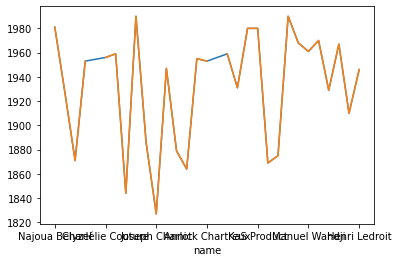

In [ ]:
fim_r["start-date"].interpolate().plot()
fim_r["start-date"].plot()
fim_r["start-date"] = fim_r["start-date"].interpolate()
fim_r